In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\soil-paper\user_behavior_dataset.csv")

df


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [19]:
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                   'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                   'Data Usage (MB/day)', 'Age']

data = df[numeric_columns]

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)



In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)


In [9]:
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['User Behavior Class'] = df['User Behavior Class']



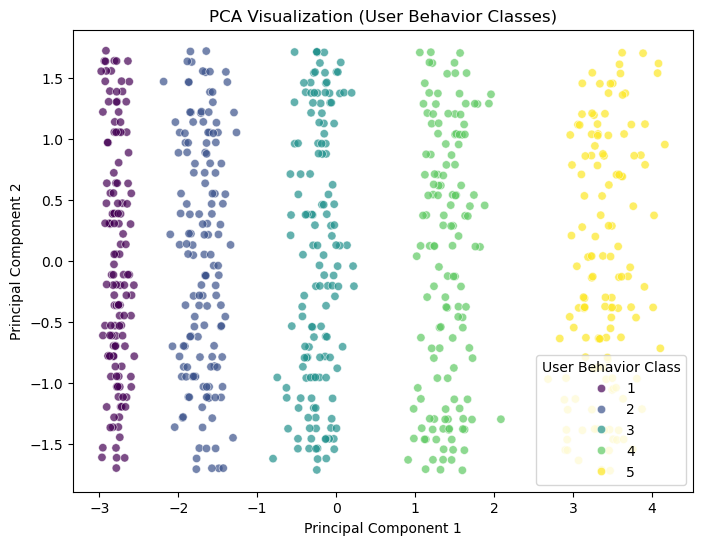

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='User Behavior Class', palette='viridis', data=df_pca, alpha=0.7)
plt.title('PCA Visualization (User Behavior Classes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='User Behavior Class')
plt.show()

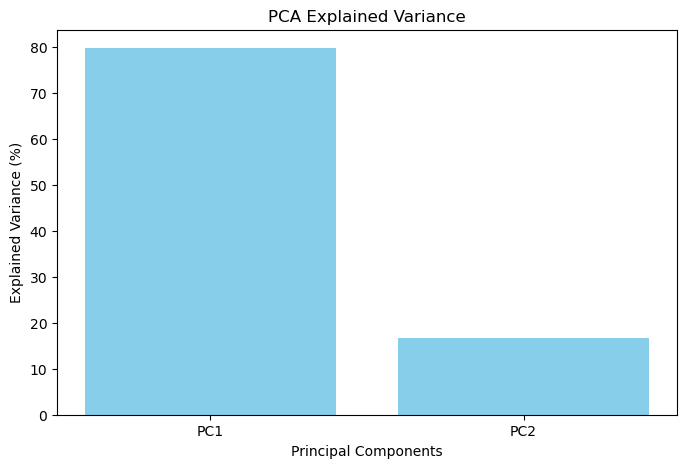

In [13]:
explained_variance = pca.explained_variance_ratio_ * 100
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance, tick_label=['PC1', 'PC2'], color='skyblue')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.show()

In [15]:
df_pca

,PC1,PC2,User Behavior Class
0,1.068515,0.121869,4
1,-0.330164,0.710650,3
2,-1.632270,0.303964,2
3,-0.024814,-1.542918,3
4,-0.281413,-0.624718,3
...,...,...,...
695,-1.692452,-1.364870,2
696,1.059088,1.705406,4
697,-1.874542,0.966162,2
698,-2.765245,0.470068,1
